# Анализ данных (EDA)

В этой тетрадке мы проведем исследовательский анализ данных (EDA), чтобы лучше понять обучающие и тестовые наборы данных.

Основная цель EDA 
- получить инсайты из данных, которые помогут нам в их подготовке для модели
- направить наши шаги по извлечению признаков 
- построить эффективный пайплайн машинного обучения.

## 1. Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 2. Загрузка данных

In [2]:
# Загрузка данных
train = pd.read_csv('train.csv', lineterminator='\n')
test = pd.read_csv('test.csv', lineterminator='\n')

# Показать первые несколько строк данных
train.head()

,date,reel_name,yt_reel_id,cartoon,url,text,seconds,is_shorts,broadcast,yt_channel_id,yt_channel_name,yt_ch_url,yt_channel_type,flag_closed,international,language
0,2023-12-30,100 подарков и только один можно оставить себе,PyGZL_fCbSc,none,https://www.youtube.com/watch?v=PyGZL_fCbSc,[100 подарков и только один можно оставить себе],1854.0,0.0,none,UCcartHVtvAUzfajflyeT_Gg,Miss Katy,https://www.youtube.com/channel/UCcartHVtvAUzf...,Блогеры,0.0,0.0,NaN
1,2018-06-29,ЗАБАГАЛИ Лизу в Реальной Жизни АРТУР и НАСТЯ F...,Lcp0pFZF4eQ,none,https://www.youtube.com/watch?v=Lcp0pFZF4eQ,[ЗАБАГАЛИ Лизу в Реальной Жизни АРТУР и НАСТЯ ...,602.0,0.0,none,UCWI7puXzGTPuxsoW2HD3XxQ,Boys and Toys,https://youtube.com/channel/UCWI7puXzGTPuxsoW2...,Блогеры,0.0,0.0,NaN
2,2023-11-26,Грозная семейка Лучшие СЕСТРИНСКИЕ моменты с...,z8d6LbiBRnk,none,https://www.youtube.com/watch?v=z8d6LbiBRnk,[Грозная семейка Лучшие СЕСТРИНСКИЕ моменты ...,3604.0,0.0,none,UCw3vK8lNe5SZzL--rMgq-CQ,Nickelodeon_Cyrillic,https://youtube.com/channel/UCw3vK8lNe5SZzL--r...,Мультфильмы,0.0,0.0,NaN
3,2016-05-30,Как сделать ожерелье из ткани своими руками,0iu0p_Y8DjM,none,https://www.youtube.com/watch?v=0iu0p_Y8DjM,[Как сделать ожерелье из ткани своими руками] ...,264.0,0.0,none,UCq1JpGFxcZTbbOAz010U-og,Трум Трум,https://youtube.com/channel/UCq1JpGFxcZTbbOAz0...,Блогеры,0.0,0.0,NaN
4,2023-07-06,Sleepover Rules Om Nom Stories Cartoon for k...,rYwOVp_Edjw,none,https://www.youtube.com/watch?v=rYwOVp_Edjw,[Sleepover Rules Om Nom Stories Cartoon for ...,42899.0,0.0,none,UCniI-BQk7qAtXNmmz40LSdg,Kedoo Toons TV Funny Animations,https://youtube.com/channel/UCniI-BQk7qAtXNmmz...,Мультфильмы,0.0,0.0,NaN



## 3. Обзор данных

### Основная информация

In [3]:
# Общая информация о данных
train.info()

# Проверка на наличие пропущенных значений
train.isnull().sum()

# Основная статистика для числовых переменных
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83411 entries, 0 to 83410
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             83411 non-null  object 
 1   reel_name        83408 non-null  object 
 2   yt_reel_id       83411 non-null  object 
 3   cartoon          83411 non-null  object 
 4   url              83411 non-null  object 
 5   text             83411 non-null  object 
 6   seconds          74653 non-null  float64
 7   is_shorts        74653 non-null  float64
 8   broadcast        74653 non-null  object 
 9   yt_channel_id    83366 non-null  object 
 10  yt_channel_name  83363 non-null  object 
 11  yt_ch_url        83363 non-null  object 
 12  yt_channel_type  83363 non-null  object 
 13  flag_closed      83363 non-null  float64
 14  international    83363 non-null  float64
 15  language         497 non-null    object 
dtypes: float64(4), object(12)
memory usage: 10.2+ MB


,seconds,is_shorts,flag_closed,international
count,74653.000000,74653.000000,83363.000000,83363.000000
mean,1921.289084,0.051023,0.038422,0.005962
std,7097.896248,0.220046,0.192215,0.076983
min,0.000000,0.000000,0.000000,0.000000
25%,200.000000,0.000000,0.000000,0.000000
50%,602.000000,0.000000,0.000000,0.000000
75%,1316.000000,0.000000,0.000000,0.000000
max,504055.000000,1.000000,1.000000,1.000000



## 4. Распределение целевой переменной

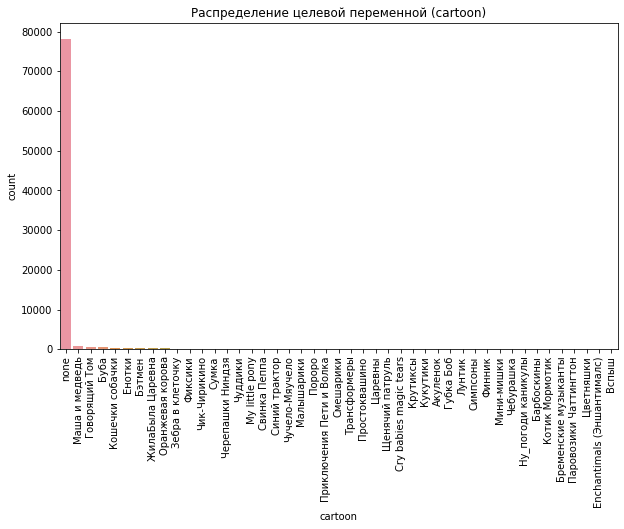

In [4]:
# Распределение целевой переменной 'cartoon'
plt.figure(figsize=(10, 6))
sns.countplot(x='cartoon', data=train, order=train['cartoon'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Распределение целевой переменной (cartoon)')
plt.show()


**Наблюдение:**
- Этот анализ поможет нам решить, нужно ли учитывать дисбаланс классов при обучении модели.

## 5. Анализ длины текста

### Длина колонки 'text'

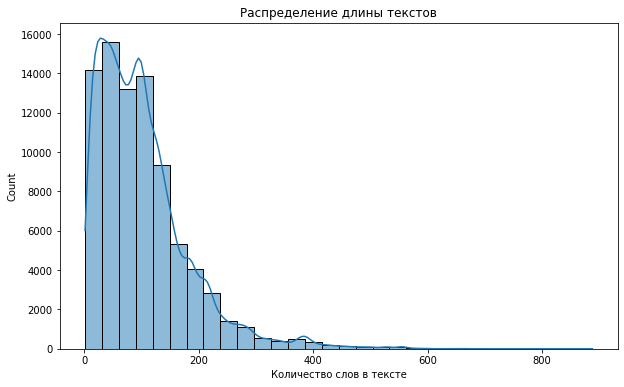

In [5]:
# Добавим столбец с длиной текста
train['text_length'] = train['text'].apply(lambda x: len(str(x).split()))

# Гистограмма для распределения длины текстов
plt.figure(figsize=(10, 6))
sns.histplot(train['text_length'], bins=30, kde=True)
plt.title('Распределение длины текстов')
plt.xlabel('Количество слов в тексте')
plt.show()


**Наблюдение:**
- Длина текста может значительно различаться, что может повлиять на способность модели классифицировать короткие и длинные описания.

## 6. Анализ количества уникальных слов

### Количество уникальных слов

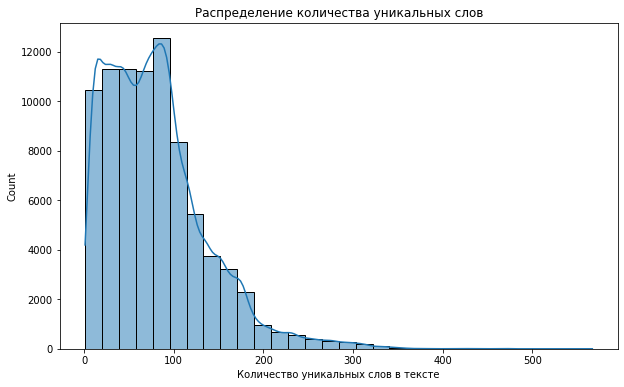

In [6]:
# Добавим столбец с количеством уникальных слов
train['unique_word_count'] = train['text'].apply(lambda x: len(set(str(x).split())))

# Гистограмма для распределения количества уникальных слов
plt.figure(figsize=(10, 6))
sns.histplot(train['unique_word_count'], bins=30, kde=True)
plt.title('Распределение количества уникальных слов')
plt.xlabel('Количество уникальных слов в тексте')
plt.show()

**Наблюдение:**
- Этот признак может помочь различать различные проекты на основе используемого словаря.

## 7. Анализ колонки 'reel_name'

### Наиболее популярные названия роликов

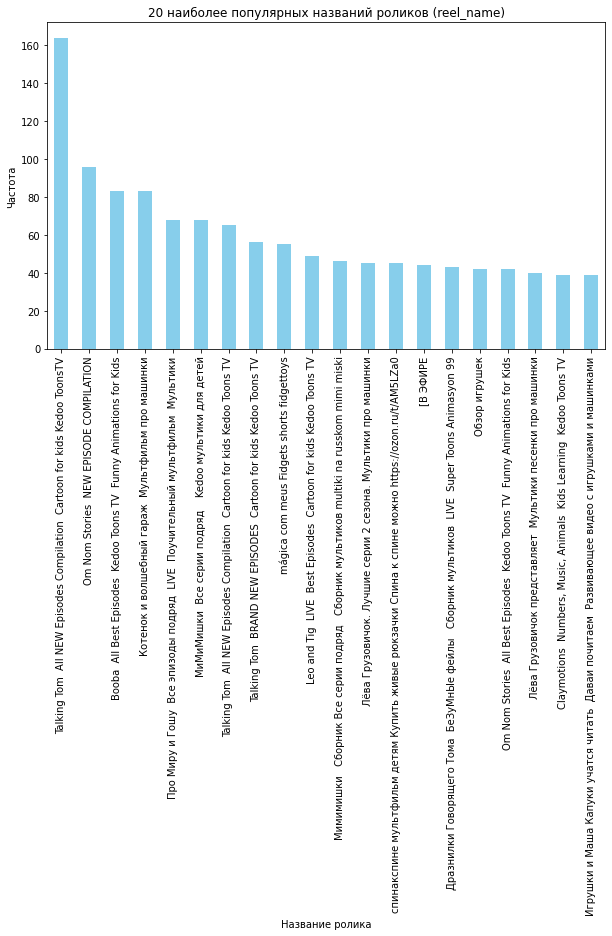

In [7]:
# Наиболее часто встречающиеся значения в 'reel_name'
plt.figure(figsize=(10, 6))
train['reel_name'].value_counts().head(20).plot(kind='bar', color='skyblue')
plt.title('20 наиболее популярных названий роликов (reel_name)')
plt.xticks(rotation=90)
plt.xlabel('Название ролика')
plt.ylabel('Частота')
plt.show()


**Наблюдение:**
- Если есть несколько часто встречающихся названий, они могут быть сильными индикаторами конкретного проекта.

## 8. Корреляционный анализ

### Корреляция между признаками

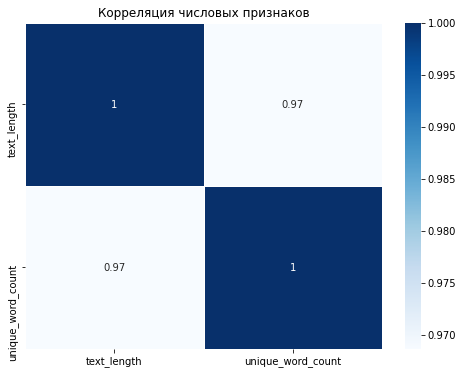

In [8]:
# Корреляция числовых признаков
corr_matrix = train[['text_length', 'unique_word_count']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Корреляция числовых признаков')
plt.show()


**Наблюдение:**
- Если присутствует высокая корреляция, мы можем рассмотреть возможность исключения одного из признаков или применения методов уменьшения размерности.

## 9. Обработка пропущенных значений

### Обработка пропущенных значений

In [9]:
# Проверка пропущенных значений
missing_values = train.isnull().sum()
print("Пропущенные значения:")
print(missing_values[missing_values > 0])

# Заполнение пропусков в текстовых полях значением 'unknown'
train.fillna('unknown', inplace=True)
test.fillna('unknown', inplace=True)

Пропущенные значения:
reel_name              3
seconds             8758
is_shorts           8758
broadcast           8758
yt_channel_id         45
yt_channel_name       48
yt_ch_url             48
yt_channel_type       48
flag_closed           48
international         48
language           82914
dtype: int64



**Наблюдение:**
- Пропущенные значения в текстовых полях заполнены значением `'unknown'`, что обеспечивает согласованность.

## Резюме и дальнейшие шаги
- **Предварительная обработка текста и reel_name**: Мы наблюдаем значительные различия в длине текста и количестве уникальных слов, что указывает на необходимость нормализации и feature engineering.
- **Дисбаланс целевой переменной**: Целевая переменная (`cartoon`) имеет дисбаланс, что следует учитывать при обучении модели, например, через стратифицированную выборку или использование весов классов.
- **Извлечение признаков**: Мы добавили дополнительные признаки, такие как длина текста и количество уникальных слов, которые могут быть полезны при моделировании.

Полученные инсайты из EDA помогут нам в дальнейших шагах по подготовке признаков и обучению модели, как представлено в следующей тетрадке, посвященном подготовке признаков, обучению и тестированию модели.